<a href="https://colab.research.google.com/github/SaumyaGupta-99/Semantic-Segmentation-of-Images/blob/main/idd_pspnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -U --pre segmentation-models

In [ ]:
import segmentation_models as sm
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [ ]:
!git clone https://github.com/mohanrajmit/IDD.git

Cloning into 'IDD'...
remote: Enumerating objects: 4891, done.
remote: Counting objects: 100% (4891/4891), done.
remote: Compressing objects: 100% (4503/4503), done.
remote: Total 4891 (delta 225), reused 4767 (delta 125), pack-reused 0
Receiving objects: 100% (4891/4891), 28.67 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
import cv2
from imutils import paths
import numpy as np
labels_path = paths.list_images("/content/IDD/idd20k_lite/gtFine")
labels_path = sorted(labels_path)

In [ ]:
def binarylab(labels_name):
  x = np.zeros([240,240,8])
  for i in range(240):
    for j in range(240):      
      if (labels_name[i][j]==255):
        x[i,j,7]=1
      else:
        x[i,j,labels_name[i][j]]=1

  return x

In [ ]:
train_labels = []
val_labels = []
train_labels_conv = []
val_labels_conv = []
import numpy as np
for imagePath in labels_path:
  make = imagePath.split("/")[-3]
  image = cv2.imread(imagePath)
  image = cv2.resize(image,(240,240),interpolation =cv2.INTER_NEAREST)
  b,g,r = cv2.split(image)
  binary_label = binarylab(r)
  if make == "train":
    train_labels.append(image)
    train_labels_conv.append(binary_label)
  else:
    val_labels.append(image)
    val_labels_conv.append(binary_label)
 

In [ ]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
train_labels_conv = np.array(train_labels_conv)
val_labels_conv = np.array(val_labels_conv)
print(train_labels.shape)
print(train_labels_conv.shape)
print(val_labels.shape)
print(val_labels_conv.shape)

(1403, 240, 240, 3)
(1403, 240, 240, 8)
(204, 240, 240, 3)
(204, 240, 240, 8)


In [ ]:
images_path=paths.list_images("/content/IDD/idd20k_lite/leftImg8bit")
images_path=sorted(images_path)
train_images = []
val_images = []
test_images = []
import numpy as np
for imagePath in images_path:
  #print(imagePath)
  make = imagePath.split("/")[-3]
  #print(make)
  image = cv2.imread(imagePath)
  image = cv2.resize(image,(240,240),interpolation=cv2.INTER_NEAREST)
  if make == "train":
    train_images.append(image)
  elif make == "test":
    test_images.append(image)
  else:
    val_images.append(image)
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(1403, 240, 240, 3)
(404, 240, 240, 3)
(204, 240, 240, 3)


In [ ]:
x_train = preprocess_input(train_images)
x_val = preprocess_input(val_images)

In [ ]:
y_train = preprocess_input(train_labels_conv)
y_val = preprocess_input(val_labels_conv)

In [ ]:
from keras import backend as K
def dice_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

In [ ]:
print(x_train)

[[[[248 230 201]
   [248 232 203]
   [239 222 195]
   ...
   [255 255 231]
   [255 254 231]
   [255 253 231]]

  [[248 230 201]
   [248 232 203]
   [239 222 195]
   ...
   [255 255 231]
   [255 254 231]
   [255 253 231]]

  [[255 237 212]
   [253 236 210]
   [246 231 205]
   ...
   [255 255 231]
   [255 254 231]
   [255 253 231]]

  ...

  [[255 239 255]
   [255 237 255]
   [255 237 255]
   ...
   [ 19  21  15]
   [ 19  21  15]
   [ 19  21  15]]

  [[255 239 255]
   [255 236 255]
   [254 236 253]
   ...
   [ 19  21  15]
   [ 19  21  15]
   [ 19  21  15]]

  [[255 240 255]
   [253 234 253]
   [250 232 249]
   ...
   [ 19  21  15]
   [ 19  21  15]
   [ 19  21  15]]]


 [[[ 11  19  18]
   [ 10  18  17]
   [ 11  19  18]
   ...
   [ 61  70  74]
   [ 64  73  77]
   [ 61  70  74]]

  [[ 11  19  18]
   [ 10  18  17]
   [ 11  19  18]
   ...
   [ 61  70  74]
   [ 64  73  77]
   [ 61  70  74]]

  [[ 14  22  21]
   [ 13  21  20]
   [ 15  23  22]
   ...
   [ 61  70  74]
   [ 66  75  79]
   [ 65  74

In [ ]:
%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!pip install -q pyyaml h5py

In [ ]:
# from datetime import datetime
# import tensorflow as tf
# from tensorflow import keras
# from keras.callbacks import TensorBoard
# logdir="/content/IDD/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=logdir)
# #tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
import tensorflow as tf
import os
from keras.callbacks import ModelCheckpoint
# checkpoint_path = "/content/drive/My Drive/pspnet/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
    # period=10)
model = sm.PSPNet(BACKBONE,input_shape=(240,240,3),classes=8,encoder_weights='imagenet')
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score,dice_coef,iou_coef],
)
#model.summary()
# tf.keras.utils.plot_model(
#     model, to_file='model.png', show_shapes=False, show_layer_names=True,
#     rankdir='TB', expand_nested=False, dpi=96
# )

85524480/85521592 [==============================] - 3s 0us/step


In [ ]:
arr = np.array(val_labels[1])
arr = arr.reshape(1,240,240,3)
arr2 = model.predict(arr)
print(arr2.shape)
arr2.reshape(240,240,8)
print(arr2[0].shape)

In [ ]:


# import tensorflow_datasets as tfds
# tfds.disable_progress_bar()

# from IPython.display import clear_output
# import matplotlib.pyplot as plt

In [ ]:
H = model.fit(
   x=x_train,
   y=y_train,
   batch_size=16,
   epochs=90,
   validation_data=(x_val,y_val),
)

Train on 1403 samples, validate on 204 samples
Epoch 1/90
1403/1403 [==============================] - 40s 29ms/step - loss: 0.2828 - iou_score: 0.7532 - dice_coef: 0.9513 - iou_coef: 0.9075 - val_loss: 0.6718 - val_iou_score: 0.5176 - val_dice_coef: 0.8403 - val_iou_coef: 0.7302
Epoch 2/90
1403/1403 [==============================] - 40s 29ms/step - loss: 0.2812 - iou_score: 0.7544 - dice_coef: 0.9515 - iou_coef: 0.9079 - val_loss: 0.6760 - val_iou_score: 0.5194 - val_dice_coef: 0.8436 - val_iou_coef: 0.7354
Epoch 3/90
1403/1403 [==============================] - 40s 29ms/step - loss: 0.2787 - iou_score: 0.7570 - dice_coef: 0.9519 - iou_coef: 0.9087 - val_loss: 0.6828 - val_iou_score: 0.5244 - val_dice_coef: 0.8442 - val_iou_coef: 0.7370
Epoch 4/90
1403/1403 [==============================] - 40s 29ms/step - loss: 0.2798 - iou_score: 0.7554 - dice_coef: 0.9522 - iou_coef: 0.9091 - val_loss: 0.6763 - val_iou_score: 0.5182 - val_dice_coef: 0.8401 - val_iou_coef: 0.7308
Epoch 5/90
1403/1

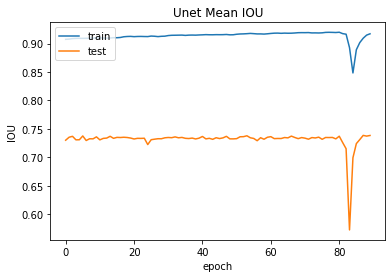

In [ ]:

import matplotlib.pyplot as plt

plt.plot(H.history['iou_coef'])
plt.plot(H.history['val_iou_coef'])
plt.title('Unet Mean IOU')
plt.ylabel('IOU')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

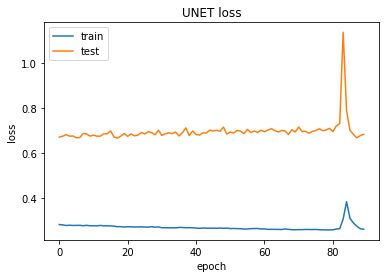

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('UNET loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive
#%cd pspnet_checkpoints/training_2/
%cd pspnet

/content/drive/My Drive
/content/drive/My Drive/pspnet


In [ ]:
model = sm.PSPNet(BACKBONE,input_shape=(240,240,3),classes=8,encoder_weights='imagenet')
model.load_weights('cp-0080.ckpt')

85524480/85521592 [==============================] - 6s 0us/step


In [ ]:
test_path= paths.list_images("/content/IDD/idd20k_lite/leftImg8bit/test")
test_path=sorted(test_path)
test_images_final = []
test_images_name = []
import os
for imagePath in test_path:
  image=cv2.imread(imagePath)
  image = cv2.resize(image,(240,240),interpolation=cv2.INTER_NEAREST)
  #print(imagePath)
  make = imagePath.split("/")[-1]
  filename = make[:make.rfind("_")]
  #print(filename)
  make1=imagePath.split("/")[-2]  
  directory="output/"+ make1
  if not os.path.exists(directory):
    os.makedirs(directory)
  image_name = "output/"+ make1+"/"+filename+"_label.png"
  test_images_final.append(image)
  test_images_name.append(image_name)
test_images_final = np.array(test_images_final)

In [ ]:
output = model.predict(test_images_final, batch_size=16,verbose=0)
output = output.reshape(output.shape[0],240,240,8)

In [ ]:
for i in range(output.shape[0]):
  sample_pred = np.argmax(output[i],axis=-1)
  sample_pred[sample_pred == 7] = 255
  cv2.imwrite(test_images_name[i],sample_pred)

In [ ]:
import numpy as np
colors = np.array([
    [128, 64, 18],      # (brown)Drivable
    [244, 35, 232],     # (pinkish-purple)Non Drivable
    [220, 20, 60],      # (red)Living Things
    [0, 0, 230],        # (blue)Vehicles
    [220, 190, 40],     # (yellow)Road Side Objects
    [70, 70, 70],       # (gray)Far Objects
    [70, 130, 180],     # (sky colour)Sky
    [0, 0, 0]           # (black)Misc
], dtype=np.int)

def visualize(temp, plot=True):
    #r,g,b =cv2.split(temp)
    r=temp
    color_image = np.zeros(
        (r.shape[0], r.shape[1], 3), dtype=np.int)
    for i in range(7):
        color_image[r == i] = colors[i]

    color_image[r == 255] = colors[7]
    #plt.imshow(image_frame)
    plt.imshow(color_image)
    plt.show()

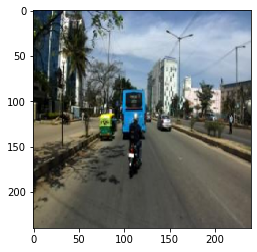

In [ ]:
sample_image = test_images_final[8]
from matplotlib import pyplot as plt
import imutils
plt.figure("original_image")
plt.imshow(imutils.opencv2matplotlib(sample_image))

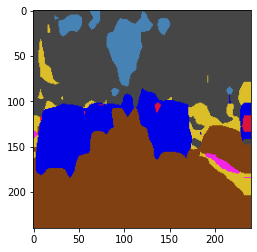

In [ ]:
sample_pred1 = np.argmax(output[3],axis=-1)
sample_pred1[sample_pred1 == 7] = 255
visualize(sample_pred1)

In [ ]:
output2 = model.predict(val_images, batch_size=16,verbose=0)
output2 = output2.reshape(output2.shape[0],240,240,8)
print(output2.shape)
sample_pred2 = np.argmax(output2,axis=-1)
sample_pred2[sample_pred2 == 7] = 255

(204, 240, 240, 8)


In [ ]:
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = 7
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        f1 = 2*((precision*recall)/(precision+recall))
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f},precision={:4.3f},recall={:4.3f},f1={:4.3f}".format(c,TP,FP,FN,precision,recall,f1))
        IoUs.append(f1)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("F!: {:4.3f}".format(f1))

In [ ]:
IoU(np.argmax(val_labels_conv,axis=-1),sample_pred2)

NameError: ignored